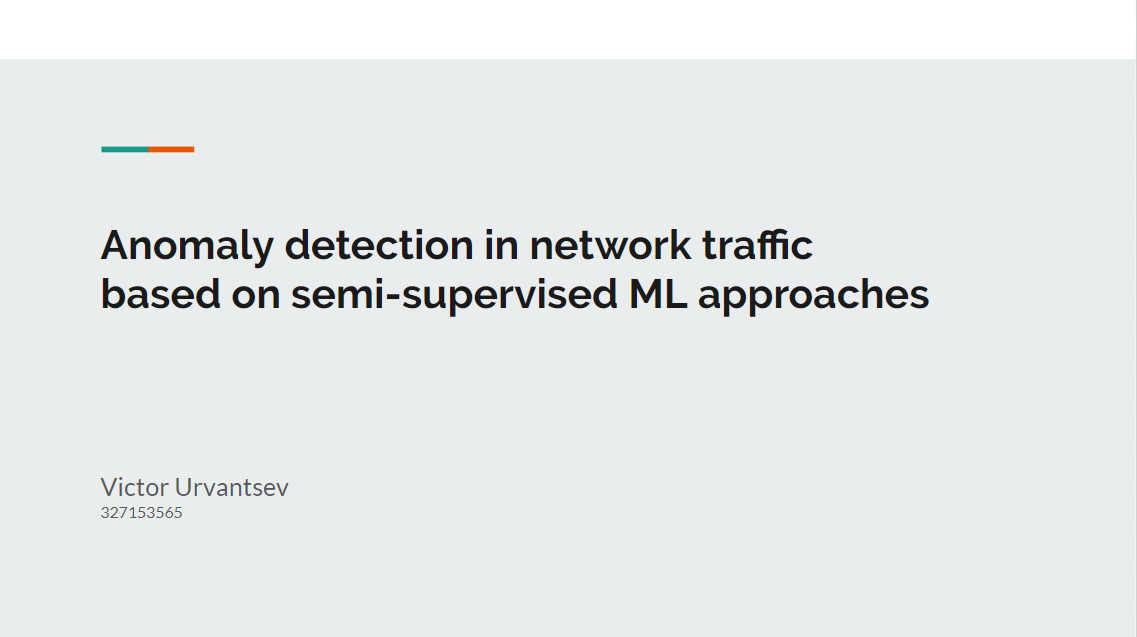

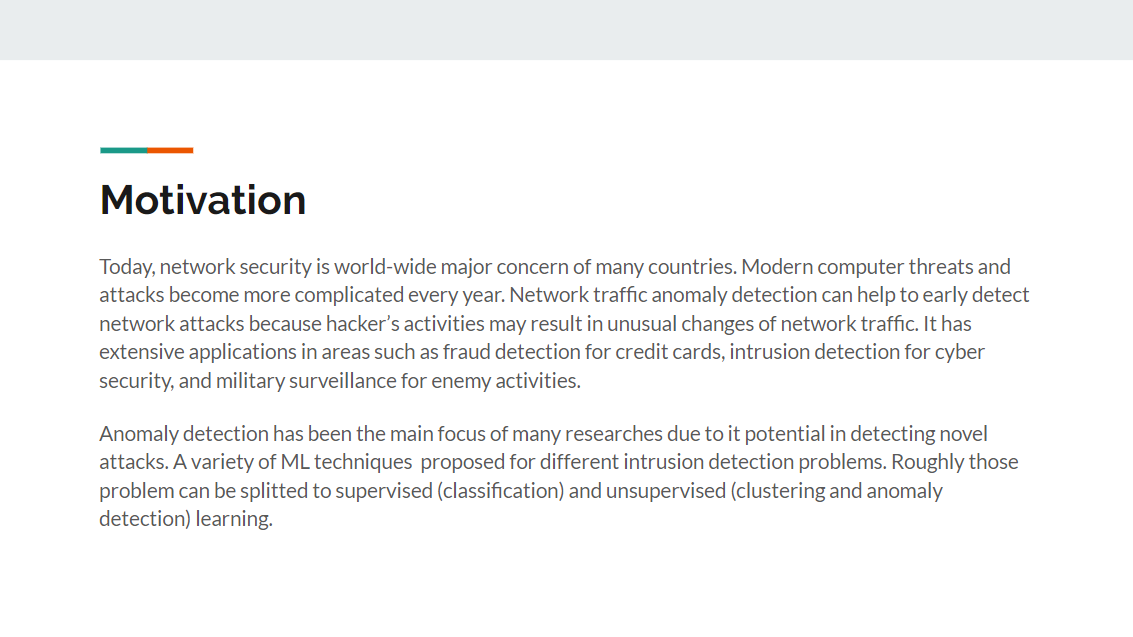

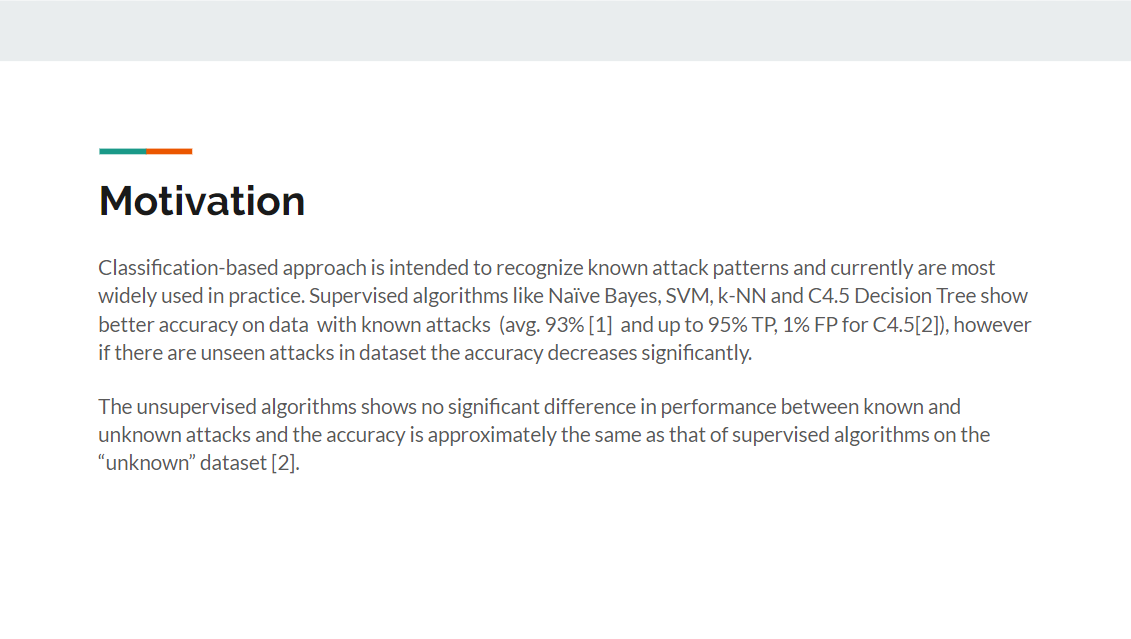

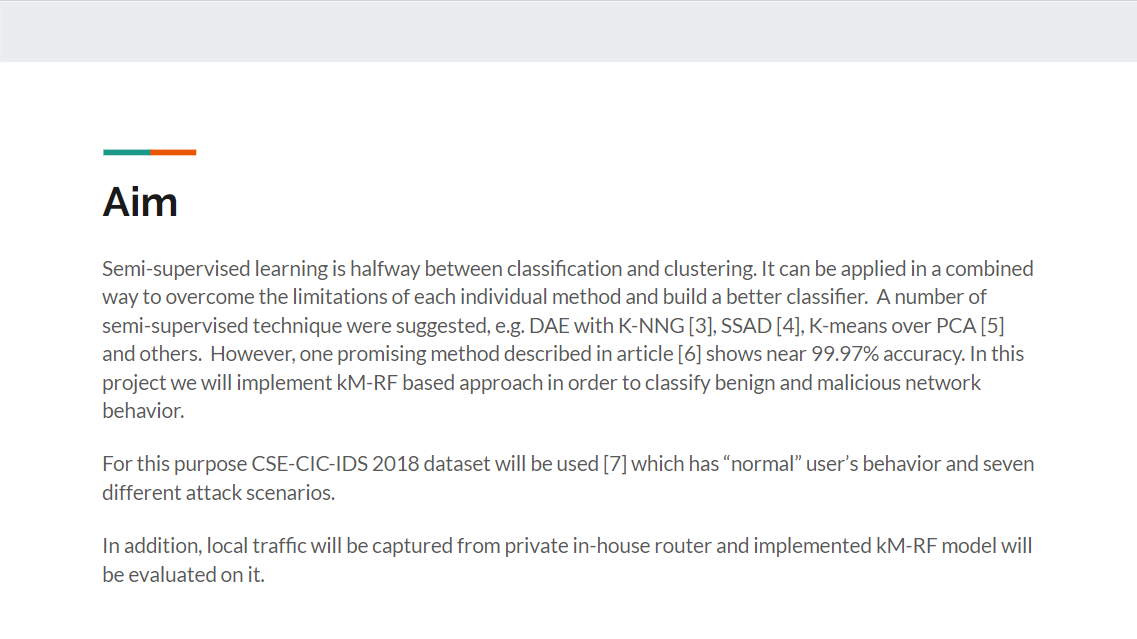

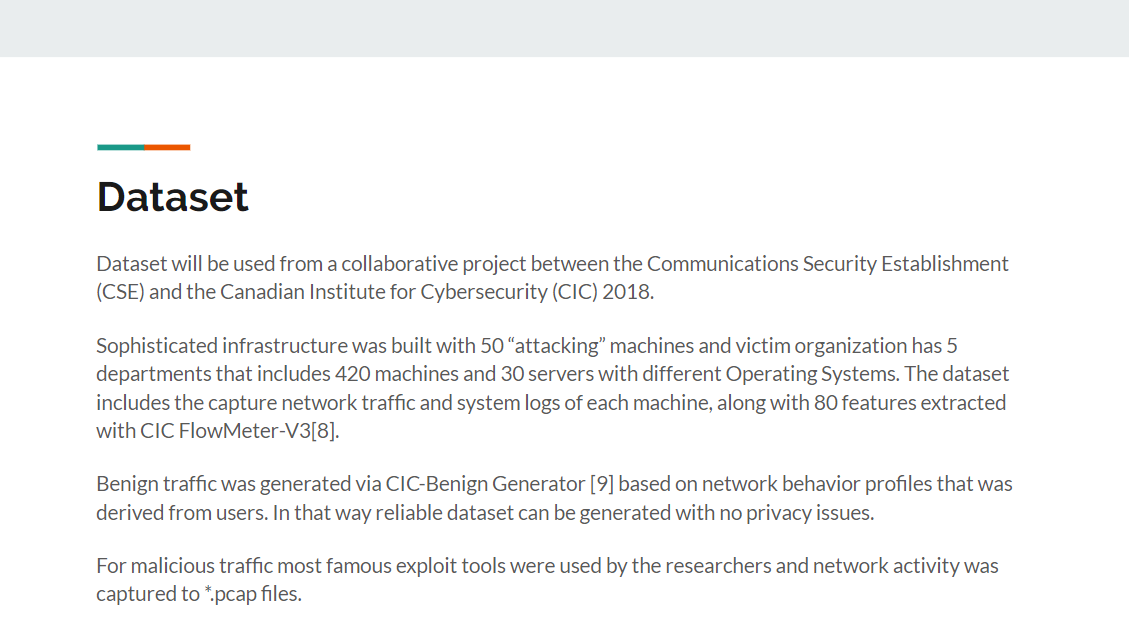

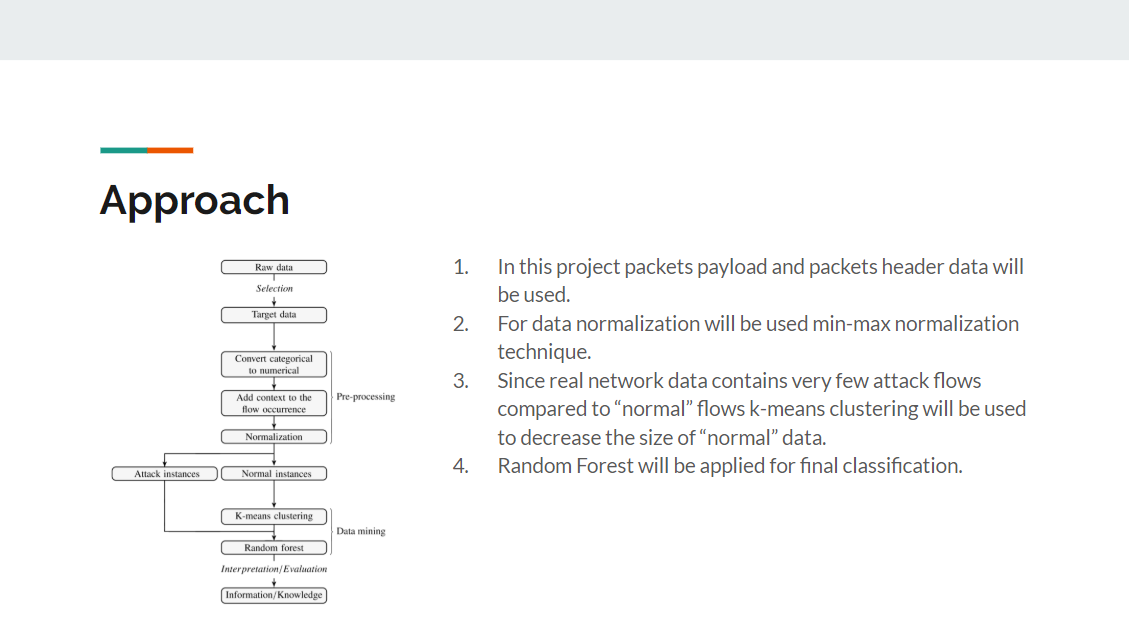

# Let's start

In [ ]:
#In this project will be implemented an approach suggested in paper:
#Intrusion detection in network systems through hybrid supervised
#and unsupervised mining process - a detailed case study on the ISCX benchmark dataset
#By Saeid SOHEILY-KHAH et al.

#https://www.researchgate.net/publication/316923166_Intrusion_detection_in_network_systems_through_hybrid_supervised_and_unsupervised_mining_process_-_a_detailed_case_study_on_the_ISCX_benchmark_dataset_-

In [1]:
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_profiling
import seaborn as sns
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.legend_handler import HandlerLine2D

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
#Change path to dataset here
os.chdir('C:\DSProject')
os.getcwd()

'C:\\DSProject'

# Data preprocessing

In [3]:
#dtypes were examined beforehand to speed up read csv
dtypes = {'Dst Port': 'uint16', 'Protocol': 'uint8', 'Flow Duration': 'uint32', 'Tot Fwd Pkts': 'uint8', 'Tot Bwd Pkts': 'uint8', 'TotLen Fwd Pkts': 'uint32', 'TotLen Bwd Pkts': 'uint32', 'Fwd Pkt Len Max': 'uint16', 'Fwd Pkt Len Min': 'uint16', 'Fwd Pkt Len Mean': 'float32', 'Fwd Pkt Len Std': 'float32', 'Bwd Pkt Len Max': 'uint16', 'Bwd Pkt Len Min': 'uint16', 'Bwd Pkt Len Mean': 'float32', 'Bwd Pkt Len Std': 'float32', 'Flow Byts/s': 'object', 'Flow Pkts/s': 'object', 'FlowFlow IAT Mean': 'float32', 'Flow IAT Std': 'float32', 'Flow IAT Max': 'uint32', 'Flow IAT Min': 'uint32', 'Fwd IAT Tot': 'uint32', 'Fwd IAT Mean': 'float32', 'Fwd IAT Std': 'float32', 'Fwd IAT Max': 'uint32', 'Fwd IAT Min': 'uint32', 'Bwd IAT Tot': 'uint32', 'Bwd IAT Mean': 'float32', 'Bwd IAT Std': 'float32', 'Bwd IAT Max': 'uint32', 'Bwd IAT Min': 'uint32', 'Fwd PSH Flags': 'uint8', 'Bwd PSH Flags': 'uint8', 'Fwd URG Flags': 'uint8', 'Bwd URG Flags': 'uint8', 'Fwd Header Len': 'uint32', 'Bwd Header Len': 'uint32', 'Fwd Pkts/s': 'float32', 'Bwd Pkts/s': 'float32', 'Pkt Len Min': 'uint16', 'Pkt Len Max': 'uint16', 'Pkt Len Mean': 'float32', 'Pkt Len Std': 'float32', 'Pkt Len Var': 'float32', 'FIN Flag Cnt': 'uint8', 'SYN Flag Cnt': 'uint8', 'RST Flag Cnt': 'uint8', 'PSH Flag Cnt': 'uint8', 'ACK Flag Cnt': 'uint8', 'URG Flag Cnt': 'uint8', 'CWE Flag Count': 'uint8', 'ECE Flag Cnt': 'uint8', 'Down/Up Ratio': 'uint8', 'Pkt Size Avg': 'float32', 'Fwd Seg Size Avg': 'float32', 'Bwd Seg Size Avg': 'float32', 'Fwd Byts/b Avg': 'uint8', 'Fwd Pkts/b Avg': 'uint8', 'Fwd Blk Rate Avg': 'uint8', 'Bwd Byts/b Avg': 'uint8', 'Bwd Pkts/b Avg': 'uint8', 'Bwd Blk Rate Avg': 'uint8', 'Subflow Fwd Pkts': 'uint8', 'Subflow Fwd Byts': 'uint32', 'Subflow Bwd Pkts': 'uint8', 'Subflow Bwd Byts': 'uint32', 'Init Fwd Win Byts': 'int64', 'Init Bwd Win Byts': 'int64', 'Fwd Act Data Pkts': 'uint8', 'Fwd Seg Size Min': 'uint8', 'Active Mean': 'float32', 'Active Std': 'float32', 'Active Max': 'uint32', 'Active Min': 'uint32', 'Idle Mean': 'float32', 'Idle Std': 'float32', 'Idle Max': 'uint64', 'Idle Min': 'uint64', 'Label': 'category'}
fheader = pd.read_csv(r'Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv', nrows=0)
df = pd.read_csv(r'Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv', dtype=dtypes, names=fheader.columns, parse_dates=[2], comment = 'D')

In [4]:
#Data was also processed on google colab https://colab.research.google.com/
#from google.colab import drive
#drive.mount('/content/drive')
#dtypes = {'Dst Port': 'uint16', 'Protocol': 'uint8', 'Flow Duration': 'uint32', 'Tot Fwd Pkts': 'uint8', 'Tot Bwd Pkts': 'uint8', 'TotLen Fwd Pkts': 'uint32', 'TotLen Bwd Pkts': 'uint32', 'Fwd Pkt Len Max': 'uint16', 'Fwd Pkt Len Min': 'uint16', 'Fwd Pkt Len Mean': 'float32', 'Fwd Pkt Len Std': 'float32', 'Bwd Pkt Len Max': 'uint16', 'Bwd Pkt Len Min': 'uint16', 'Bwd Pkt Len Mean': 'float32', 'Bwd Pkt Len Std': 'float32', 'Flow Byts/s': 'object', 'Flow Pkts/s': 'object', 'FlowFlow IAT Mean': 'float32', 'Flow IAT Std': 'float32', 'Flow IAT Max': 'uint32', 'Flow IAT Min': 'uint32', 'Fwd IAT Tot': 'uint32', 'Fwd IAT Mean': 'float32', 'Fwd IAT Std': 'float32', 'Fwd IAT Max': 'uint32', 'Fwd IAT Min': 'uint32', 'Bwd IAT Tot': 'uint32', 'Bwd IAT Mean': 'float32', 'Bwd IAT Std': 'float32', 'Bwd IAT Max': 'uint32', 'Bwd IAT Min': 'uint32', 'Fwd PSH Flags': 'uint8', 'Bwd PSH Flags': 'uint8', 'Fwd URG Flags': 'uint8', 'Bwd URG Flags': 'uint8', 'Fwd Header Len': 'uint32', 'Bwd Header Len': 'uint32', 'Fwd Pkts/s': 'float32', 'Bwd Pkts/s': 'float32', 'Pkt Len Min': 'uint16', 'Pkt Len Max': 'uint16', 'Pkt Len Mean': 'float32', 'Pkt Len Std': 'float32', 'Pkt Len Var': 'float32', 'FIN Flag Cnt': 'uint8', 'SYN Flag Cnt': 'uint8', 'RST Flag Cnt': 'uint8', 'PSH Flag Cnt': 'uint8', 'ACK Flag Cnt': 'uint8', 'URG Flag Cnt': 'uint8', 'CWE Flag Count': 'uint8', 'ECE Flag Cnt': 'uint8', 'Down/Up Ratio': 'uint8', 'Pkt Size Avg': 'float32', 'Fwd Seg Size Avg': 'float32', 'Bwd Seg Size Avg': 'float32', 'Fwd Byts/b Avg': 'uint8', 'Fwd Pkts/b Avg': 'uint8', 'Fwd Blk Rate Avg': 'uint8', 'Bwd Byts/b Avg': 'uint8', 'Bwd Pkts/b Avg': 'uint8', 'Bwd Blk Rate Avg': 'uint8', 'Subflow Fwd Pkts': 'uint8', 'Subflow Fwd Byts': 'uint32', 'Subflow Bwd Pkts': 'uint8', 'Subflow Bwd Byts': 'uint32', 'Init Fwd Win Byts': 'int64', 'Init Bwd Win Byts': 'int64', 'Fwd Act Data Pkts': 'uint8', 'Fwd Seg Size Min': 'uint8', 'Active Mean': 'float32', 'Active Std': 'float32', 'Active Max': 'uint32', 'Active Min': 'uint32', 'Idle Mean': 'float32', 'Idle Std': 'float32', 'Idle Max': 'uint64', 'Idle Min': 'uint64', 'Label': 'category'}
#fheader = pd.read_csv(r'drive/My Drive/DSProject/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv', nrows=0)
#df = pd.read_csv(r'drive/My Drive/DSProject/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv', dtype=dtypes, names=fheader.columns, parse_dates=[2], comment = 'D')

In [5]:
#To see some usefull info about the dataset (constant columns, missing values, correlation between columns, etc)
#pfr = pandas_profiling.ProfileReport(df)
#pfr.to_file("profiling_results.html")

In [6]:
#Drop all statistics columns and Timestamp - all stats can be computed from other columns
df = df.loc[:, ~df.columns.str.contains('Timestamp|Max|Min|Mean|Std|Var|Subflow')]

In [7]:
#find all NA values in each column
for column in df:
    if df[column].isna().any():
       print('{0} has {1} null values'.format(column, df[column].isna().sum()))

Flow Byts/s has 2277 null values


In [8]:
#print rows with NA values
df[df.isna().any(1)]

In [9]:
#show Infinity values (string) - they mostly labeled as Benign
df[df.isin(['Infinity']).any(1)]

#we can see that NaN and 'Infinity' values in Flow Byts/s are in the same rows as 'Infinity' in Flow Pkts/s
#we will drop that lines

In [10]:
#check Benign/Attack labels ratio within rows with 'Infinity' value
df[df.isin(['Infinity']).any(1)].Label.value_counts()

In [11]:
#replace infinity with NaN
df.replace('Infinity', np.nan, inplace=True)

In [12]:
#and drop all rows with NaN values
df.dropna(inplace=True)

In [13]:
#remove column if it has constant values
df = df.loc[:, df.nunique() != 1]

In [14]:
#Here we can try to reduce memory usage. Not so useful for now, because MinMaxScaler will return it to float.
#This cell was used to determine dtypes and load it while read csv was used in the begining

#cols_obj = df.loc[:, df.dtypes.isin([np.dtype('object')])].columns
#cols_int = df.loc[:, df.dtypes.isin([np.dtype('int64')])].columns
#cols_float = df.loc[:, df.dtypes.isin([np.dtype('float64')])].columns
#df.loc[:, cols_obj] = df.loc[:, cols_obj].apply(pd.to_numeric, errors='raise')
#df.loc[:, cols_int] = df.loc[:, cols_int].apply(pd.to_numeric, downcast='unsigned', errors='raise')
#df.loc[:, cols_float] = df.loc[:, cols_float].apply(pd.to_numeric, downcast='float', errors='raise')


In [15]:
#we will use data that has port variable frequency more than 2%. With these application layers we cover 88.9% of all data
#80, 443 - https; 22 - SSH; 21 - FTP; 53 - DNS; 3389 - RDP; 445 - NetBIOS
ports = [80, 443, 22, 21, 53, 3389, 445]

#check how much usefull data we miss when using only those ports
df_other = df[~df['Dst Port'].isin(ports)]
df_other.Label.value_counts()

#only Benign data

Benign            111414
SSH-Bruteforce         0
FTP-BruteForce         0
Name: Label, dtype: int64

In [16]:
df = df[df['Dst Port'].isin(ports)]
df.Label.value_counts()

Benign            552394
FTP-BruteForce    193354
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [17]:
#split to application layers as suggested in the article, because internet traffic may vary a lot in different layers
df_ssh = df[df['Dst Port']==22]
df_ftp = df[df['Dst Port']==21]
df_web = df[df['Dst Port'].isin(('80', '443'))]
df_dns = df[df['Dst Port']==53]
df_rdp = df[df['Dst Port']==3389]
df_netbios = df[df['Dst Port']==445]

In [18]:
df_ftp.Label.value_counts()

FTP-BruteForce    193354
Benign                38
SSH-Bruteforce        30
Name: Label, dtype: int64

In [19]:
#First problem. Imbalanced dataset with small set of Benign traffic and large SSH Bruteforce traffic
#For this data we can see accuracy paradox - classification algo will predict malicious traffic in most cases
#And we will get high accuracy score but the accuracy is only reflecting the underlying class distribution.

#We will use suggested KMeans algo to remove outliers from Benign traffic and then use class weights for RF or SMOTE (explained futher) 

#ROC curve score will be used in this example. It is good for imbalanced datasets and binary classification problem

df_ssh.Label.value_counts()

SSH-Bruteforce    187559
Benign               322
FTP-BruteForce         0
Name: Label, dtype: int64

In [20]:
#Split the data into training and testing sets

ssh_data = df_ssh[df_ssh['Label'].isin(('SSH-Bruteforce', 'Benign'))]
ssh_data = ssh_data.loc[:, ssh_data.nunique() != 1]

#change Label to 0 and 1 (for Benign and SSH-Bruteforce accordingly)
mapping = {'Benign': 0, 'SSH-Bruteforce': 1}
ssh_data = ssh_data.replace({'Label': mapping})
labels = ssh_data['Label']


In [21]:
data_train, data_test, labels_train, labels_test = train_test_split(ssh_data.drop('Label', axis=1), labels, test_size=0.33, random_state=42)

# Scaling, dimension reduction and removing outliers

In [22]:
#Columns with Flags we don't want to scale (also Ratio and Label)
features = data_train.columns[~data_train.columns.str.contains('Flag|Ratio|Label')]
cols_to_check = features

#We want to save outliers and do not standardize all values,so
#MinMax scaler in range [0, 1], excluding columns with binary values (Flags, Ratio).
scaler = MinMaxScaler()
scaler.fit(data_train[features].astype(np.float))


data_train[features] = scaler.transform(data_train[features].astype(np.float))
data_test[features] = scaler.transform(data_test[features].astype(np.float))

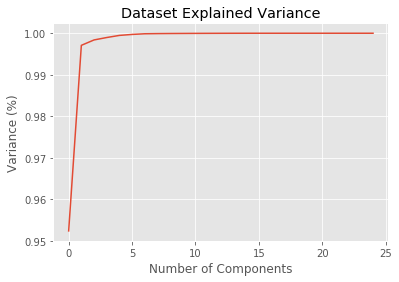

In [23]:
#Fitting the PCA algorithm 

pca = PCA().fit(data_train) 
    
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Dataset Explained Variance')
plt.show()


In [24]:
#use PCA dimesion reduction. 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_train)
principalDf = pd.DataFrame(data = principalComponents)



In [26]:
#Let's merge back df after PCA and it's labels
reduced_df = principalDf.merge(labels_train.to_frame().reset_index(drop=True), right_index=True, left_index=True)
reduced_df.Label.value_counts()

1    125667
0       213
Name: Label, dtype: int64

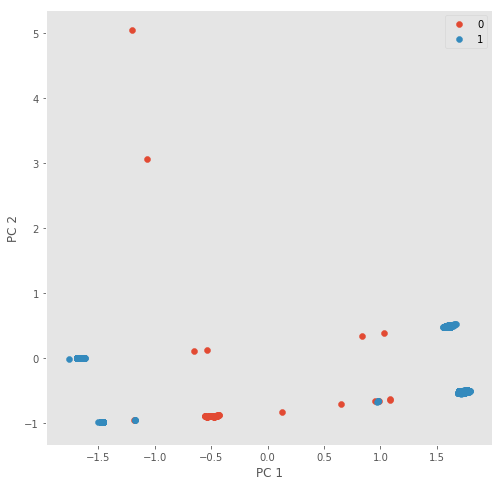

In [27]:
#plot PCA dimesion reduction. 0 - Benign traffic, 1 - SSH-Bruteforce

X = reduced_df

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = X['Label'] == target
    ax.scatter(X.loc[indicesToKeep, 0],
              X.loc[indicesToKeep, 1])
ax.legend(targets)
ax.grid()

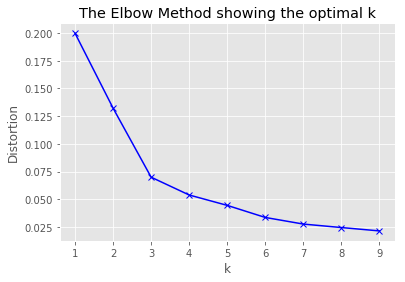

In [28]:
# clustering dataset
# determine k using elbow method

# k means determine k
distortions = []
K = range(1,10)

#select rows with normal (not attack) behaviour
x = reduced_df.loc[reduced_df['Label'] == 0]
x = x.loc[:, x.columns != 'Label']
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


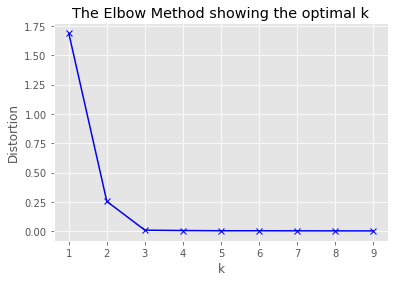

In [29]:
# clustering dataset
# determine k using elbow method

# k means determine k
distortions = []
K = range(1,10)

#select rows with SSH-Bruteforce behavior
x = reduced_df.loc[reduced_df['Label'] == 1]
x = x.loc[:, x.columns != 'Label']
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [30]:
#decrease the set size of normal data using K-means algorithm

norm_clusters = 3
atck_clusters = 3

#find all centroids for normal data
norm_kmeans = KMeans(n_clusters=norm_clusters, random_state=42)
norm_data = reduced_df.loc[reduced_df['Label'] == 0].loc[:, reduced_df.columns != 'Label']
norm_kmeans = norm_kmeans.fit(norm_data)
norm_centroids = norm_kmeans.cluster_centers_

#find all centroids for attack data
atck_kmeans = KMeans(n_clusters=atck_clusters, random_state=42)
atck_data = reduced_df.loc[reduced_df['Label'] == 1].loc[:, reduced_df.columns != 'Label']
atck_kmeans = atck_kmeans.fit(atck_data)
atck_centroids = atck_kmeans.cluster_centers_



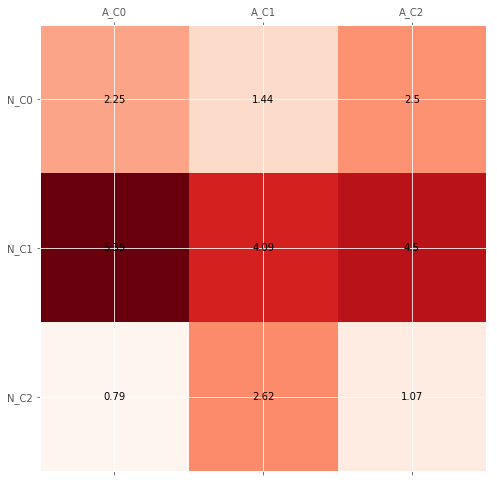

In [31]:
z = []

for i in range(0, norm_clusters):
    for j in range(0, atck_clusters):
        z.append(distance.euclidean(norm_centroids[i], atck_centroids[j]))
 
z = np.array(z)

# Calculate the shape of the 2d array
C = z.reshape((norm_clusters,atck_clusters))

# Plot the matrix
matfig = plt.figure(figsize=(8,8))
plt.matshow(C,cmap="Reds", fignum=matfig.number)


ax = plt.gca()

# Set the plot labels
xlabels = ["A_C%d" % (i-1) for i in range(atck_clusters+1)]
ylabels = ["N_C%d" % (i-1) for i in range(norm_clusters+1)]
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)

#Add text to the plot showing the values at that point
for i in range(atck_clusters):
    for j in range(norm_clusters):
        plt.text(i,j, round(C[j,i],2), horizontalalignment='center', verticalalignment='center')

plt.show()

In [32]:
#choose closest clusters based on mean
#Maybe different metrics should be used
closest_clusters = set()
zmean = np.mean(z)
z.shape = (norm_clusters, atck_clusters)
for i in range(0, norm_clusters):
        if np.mean(z[i]) < zmean:
            closest_clusters.add(i)

print(closest_clusters)

{0, 2}


In [33]:
#delete clusters if necessary

#closest_clusters.remove(2)
#rem = (2, 3)
#[closest_clusters.remove(i) for i in rem]
#print(closest_clusters)

In [34]:
#as we can see, first normal centroid and the third are closest to attack centroids.
#in order to get more smaller and relevant data set we will delete other samples from Benign set

#select all 'Benign' rows
closest_df = pd.DataFrame(reduced_df.loc[reduced_df['Label'] == 0])

#add column vector based on kmeans labels
closest_df.loc[:,'Centroid'] = norm_kmeans.labels_

#drop rows that are not closest
closest_df = closest_df.loc[closest_df['Centroid'].isin(closest_clusters)]

#concatenate normal centroids to that dataframe
centroids_list = []
for i in list(closest_clusters):
    centroids_list.append(norm_centroids[i])
centroids_df  = pd.DataFrame(centroids_list).assign(Label=0)

closest_df = pd.concat([closest_df.drop('Centroid', axis=1), centroids_df], ignore_index=True)

#new normal dataset is smaller now:
print("%s %d %s" % ('The size of Benign set was', len(reduced_df.loc[reduced_df['Label'] == 0]), 'rows'))
print("%s %d %s" % ('Now the size of Benign set is', len(closest_df), 'rows'))
print("%.2f %s" % (100 - len(closest_df)/len(reduced_df.loc[reduced_df['Label'] == 0])*100, '% smaller'))

The size of Benign set was 213 rows
Now the size of Benign set is 213 rows
0.00 % smaller


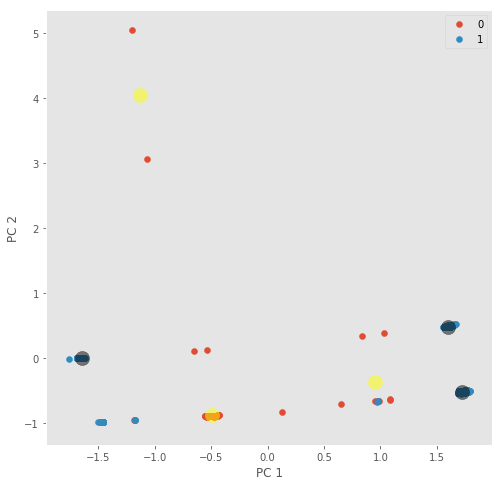

In [35]:
#plot PCA dimesion reduction

X = reduced_df

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = X['Label'] == target
    ax.scatter(X.loc[indicesToKeep, 0],
              X.loc[indicesToKeep, 1])
    
ax.scatter(norm_centroids[:, 0], norm_centroids[:, 1], c='yellow', s=200, alpha=0.5);
ax.scatter(atck_centroids[:, 0], atck_centroids[:, 1], c='black', s=200, alpha=0.5);
ax.legend(targets)
ax.grid()

In [36]:
#merge new Benign data set with closest samples with SSH-BF data set
merged_df = pd.concat([closest_df, reduced_df.loc[reduced_df['Label'] == 1]], ignore_index=True)
merged_df = merged_df.sample(frac=1).reset_index(drop=True) #shuffle it

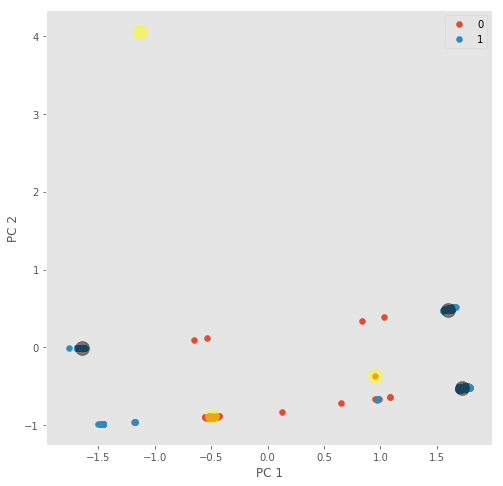

In [37]:
#plot PCA dimesion reduction now with new merged df

X = merged_df

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = X['Label'] == target
    ax.scatter(X.loc[indicesToKeep, 0],
              X.loc[indicesToKeep, 1])
ax.scatter(norm_centroids[:, 0], norm_centroids[:, 1], c='yellow', s=200, alpha=0.5);
ax.scatter(atck_centroids[:, 0], atck_centroids[:, 1], c='black', s=200, alpha=0.5);
ax.legend(targets)
ax.grid()

In [38]:
#we can see that outliers of normal traffic were removed, and it's centroid was added

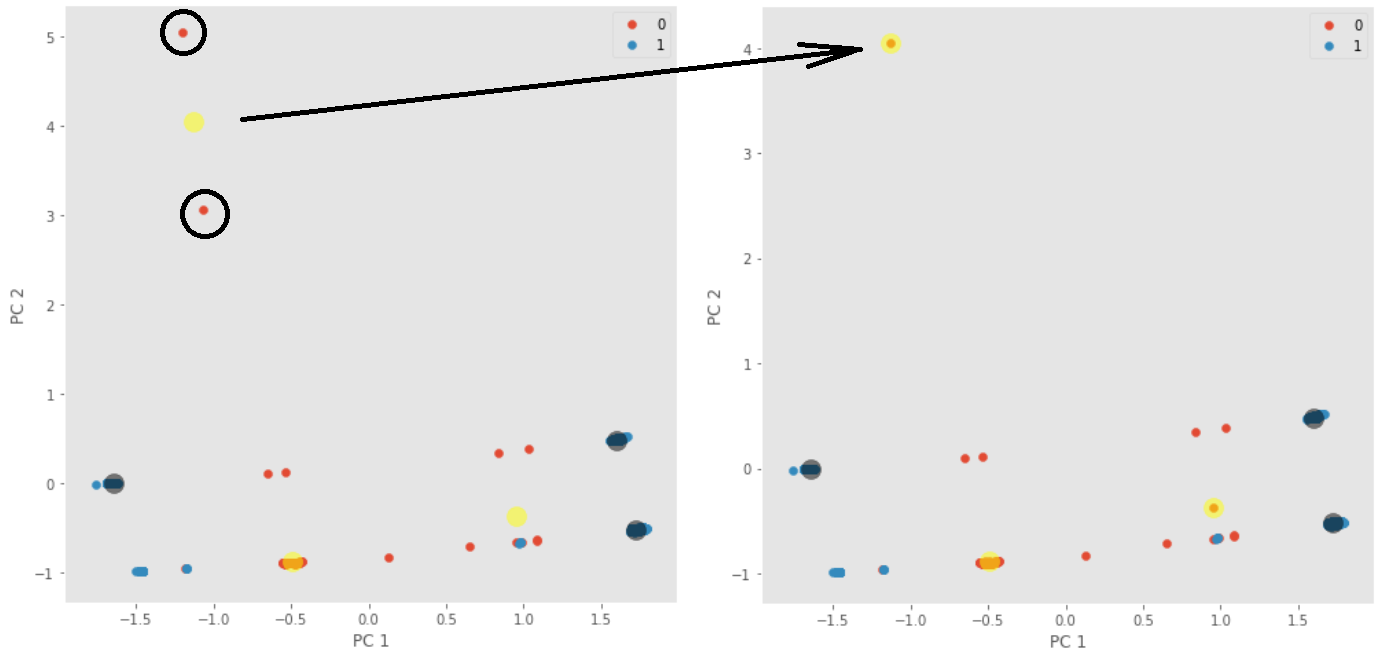

In [39]:
#update train sets
data_train = merged_df.drop('Label', axis=1)
labels_train = merged_df.Label

In [40]:
#The higher the Silhouette coefficient, the more isolated the clusters are (the higher is better)

silhouette_avg_before = silhouette_score(reduced_df, reduced_df[['Label']].values.ravel())
silhouette_avg_after = silhouette_score(merged_df, merged_df[['Label']].values.ravel())
print("avg silhouette score before kmeans is :", silhouette_avg_before)
print("avg silhouette score after kmeans is :", silhouette_avg_after)

avg silhouette score before kmeans is : 0.16677978593941487
avg silhouette score after kmeans is : 0.15783304547115118


In [41]:
#~0.166 before
#~0.157 after
#Not much change in silhouette score (makes sense, not much outliers were removed)
#When instead of only SSH app layer dataset we took whole dataset and do same outliers reduction, silhouette score improved:

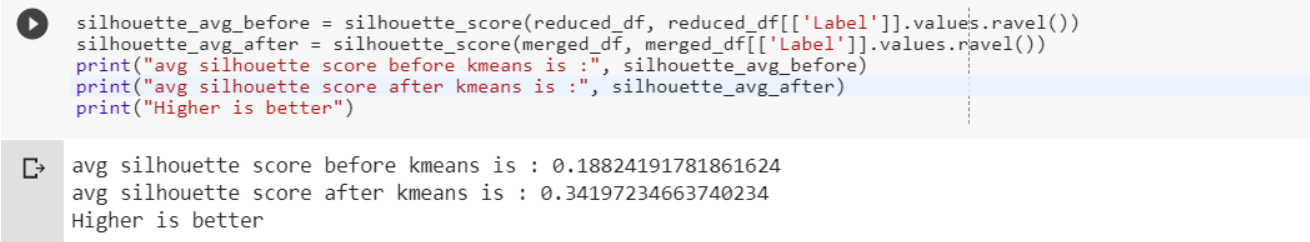

In [42]:
#in whole dataset after KMeans outliers reduction:

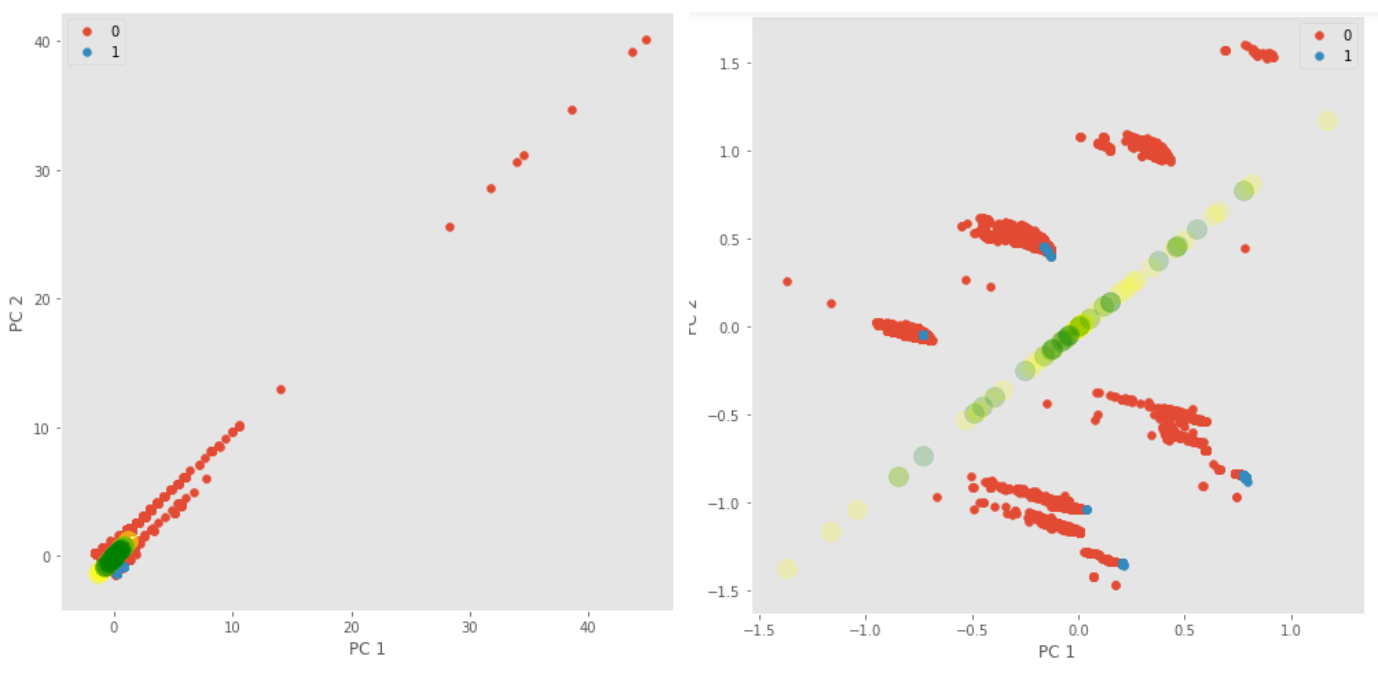

# Random Forest Classifier

## Default RF

In [43]:
#Let's run Random Forest Classifier with default parameters to get baseline
rf_default = RandomForestClassifier(n_estimators=1000)
rf_default.fit(data_train, labels_train)


#transofrm test data to pca  and predict
data_test = pca.transform(data_test)
y_pred = rf_default.predict(data_test)
y_test = labels_test.values

In [44]:
#Here we will use confusion matrix, f1 score and roc auc score
#The F1 score can be interpreted as a weighted average of the precision and recall.
#roc auc score is Area Under the ROC Curve (ROC curve plots TPR vs. FPR at different classification thresholds)
#These metrics should be good for binary data classification problems

print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[  105     4]
 [    0 61892]]
0.9999676866901477
0.981651376146789


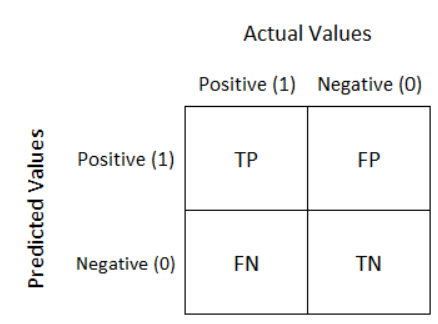

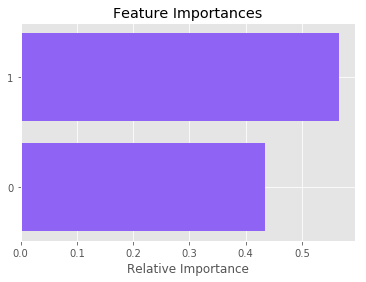

In [45]:
#Very good scores and only few FP values!
#The problem is that with very unbalanced data the model will choose to predict
#major class all the time and will have still high accuracy
#We will try to handle this issue futher

#Lets plot feture importance to see how it distributed
features = data_train.columns.values
importances = rf_default.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

## Weighted RF

In [46]:
#One way to handle data imbalance (in RF classification) is to use 'class_weight' parameter
#With class_weight = 'balanced' or 'balanced_subsample', the model will penalize the mis-classification of minority class
#We will search for optimal hyperparameters with Randomized Search, it should be much faster than GridSearchCV

#Also we will use kappa score as a scorrer 
#it is a score that expresses the level of agreement between two annotators on a classification problem

In [47]:
kappa_scorer = make_scorer(cohen_kappa_score)

rf_balanced = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [115, 125, 135],
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [5, 6, 7, 8],
    'min_samples_split': [1.0, 2, 3, 4],
    'class_weight': ['balanced', 'balanced_subsample'],
    'oob_score': ['True', 'False']
}


random_search = RandomizedSearchCV(rf_balanced, param_distributions=param_grid, scoring=kappa_scorer, 
                                   cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=5)


random_search = random_search.fit(merged_df.drop('Label', axis=1), merged_df['Label'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   57.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.3s finished


In [48]:
print(random_search.best_score_)
print(random_search.best_params_)

0.9831552002439808
{'oob_score': 'False', 'n_estimators': 125, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 5, 'class_weight': 'balanced'}


In [49]:
# Use the forest's predict method on the test data
rf_balanced = RandomForestClassifier(**random_search.best_params_, random_state = 42, n_jobs=-2)

# Train the model on training data
rf_balanced.fit(data_train, labels_train);

In [50]:
#and again we get good scores on prediction
y_test = labels_test.values
y_pred = rf_balanced.predict(data_test)

print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))



[[  105     4]
 [    1 61891]]
0.999959608036385
0.98164329755828


## Oversampling with SMOTE

In [51]:
#!!! pip install imblearn !!!
#Uncomment this line:

#!pip install imblearn

In [52]:
#Another technique is SMOTE - Synthetic Minority Over-sampling Technique
#it will generate similar looking data as in minority class to increase its samples
#inspired by https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(labels_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(labels_train==0)))

sm = SMOTE(random_state=42)
data_train_result, labels_train_result = sm.fit_sample(data_train, labels_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(labels_train_result==1)))
print("After OverSampling, counts of label '0': {}".format(sum(labels_train_result==0)))


data_train = pd.DataFrame(data_train_result, columns=data_train.columns)
labels_train = labels_train_result


Before OverSampling, counts of label '1': 125667
Before OverSampling, counts of label '0': 213 

After OverSampling, counts of label '1': 125667
After OverSampling, counts of label '0': 125667


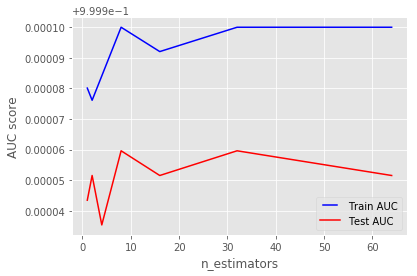

In [53]:
#Instead of Randomized Search, let's try to plot different parameters and how the impact roc_auc score
n_estimators = [1, 2, 4, 8, 16, 32, 64]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(data_train, labels_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [54]:
#Number of estimators (num of threes in forest) best to be about 8

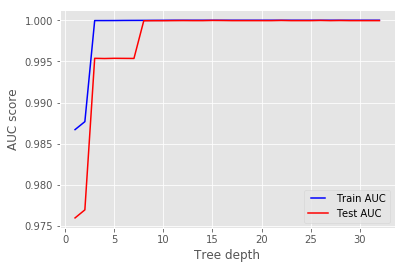

In [55]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_estimators=100, n_jobs=-1)
   rf.fit(data_train, labels_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

In [56]:
#here again we can see that with Tree depth more than 8 there is no gain in auc score

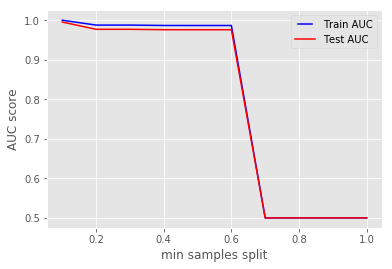

In [57]:
#min_samples_split represents the minimum number of samples required to split an internal node.
#This can vary between considering at least one sample at each node to considering all of the samples at each node.
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split, n_estimators=100)
   rf.fit(data_train, labels_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [ ]:
#min samples split best to be ~0.1

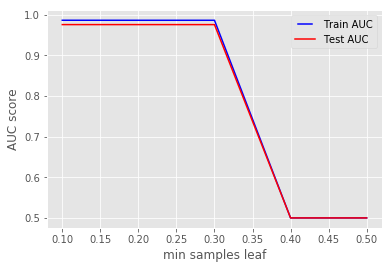

In [58]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_estimators=100)
   rf.fit(data_train, labels_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [59]:
#min samples leaf <0.3 should be good

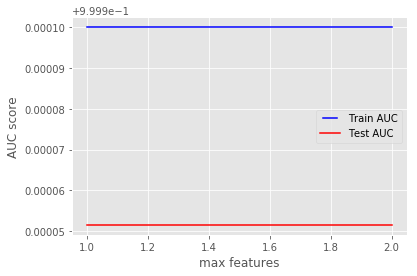

In [60]:
max_features = list(range(1,data_train.shape[1]+1))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature, n_estimators=100)
   rf.fit(data_train, labels_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [61]:
#We have only two features, not much difference when using 1 or 2... (?)

In [69]:
# Import the model we are using
# Instantiate model with 1000 decision trees
rf_smote = RandomForestClassifier(n_estimators=8, max_depth=8, min_samples_split=0.1, min_samples_leaf=0.2, max_features=2, random_state = 42, n_jobs=-2)
# Train the model on training data
rf_smote.fit(data_train, labels_train);

In [70]:
# Use the forest's predict method on the test data

y_test = labels_test.values
y_pred = rf_smote.predict(data_test)

print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[  104     5]
 [  140 61752]]
0.9988273257365609
0.9759332177922241


# Checking models on new dataset

In [71]:
#I tried to collect traffic on private home's router via tcpdump tool with 2 conditions:
# 1. 2Gb of traffic was collected while routine user's behaviour - Web, games, youtube, etc. - Clean traffic
# 2. 2Gb of traffic was collected while in addition to routine behaviour I tried the same tool
# the researches were using for SSH-Bruteforce ('patator' ssh bruteforce)
# Let's take a look at these datasets

new_bf_data = pd.read_csv(r'router_bf.pcap_Flow.csv')
new_clean_data = pd.read_csv(r'router_clean.pcap_Flow.csv')

In [72]:
#Clean dataset
new_clean_data = new_clean_data[ssh_data.columns]
new_clean_data = new_clean_data.drop('Label', axis=1)

new_clean_data[cols_to_check] = scaler.transform(new_clean_data[cols_to_check].astype(np.float))
pc_clean = pca.transform(new_clean_data)
pc_clean = pd.DataFrame(data=pc_clean)

#BruteForce dataset
new_bf_data = new_bf_data[ssh_data.columns]
new_bf_data = new_bf_data.drop('Label', axis=1)

new_bf_data[cols_to_check] = scaler.transform(new_bf_data[cols_to_check].astype(np.float))
pc_bf = pca.transform(new_bf_data)
pc_bf = pd.DataFrame(data=pc_bf)

In [73]:
#each model will try to predict if there was any malicious traffic
#NOTE: not confusion matrix will be printed, but frequency of each traffic's labels
#[0 - Benign, 1 - SSH-BF]

def predict(x):
    
    rfs = [rf_default, rf_balanced, rf_smote]
    names = ["RF default", "RF Balanced", "RF SMOTE"]
    k = 0
    
    for i in rfs: 
        vals = i.predict(x)
        vals_proba = i.predict_proba(x)
        unique, counts = np.unique(vals, return_counts=True)
        
        pd.DataFrame(vals_proba).plot(kind='kde', title=names[k])   
        print (np.asarray((unique, counts)).T)
        print("{0} {1:.2f} {2}\n".format(names[k], counts[0]/sum(counts)*100, "of traffic is Benign"))
        k+=1

[[   0 4293]
 [   1 3350]]
RF default 56.17 of traffic is Benign

[[   0 4375]
 [   1 3268]]
RF Balanced 57.24 of traffic is Benign

[[   0 2885]
 [   1 4758]]
RF SMOTE 37.75 of traffic is Benign



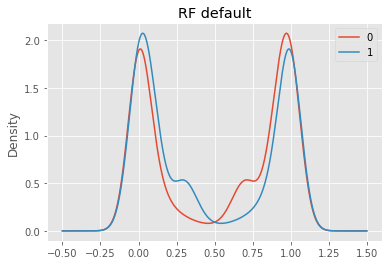

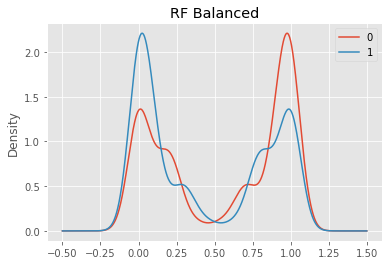

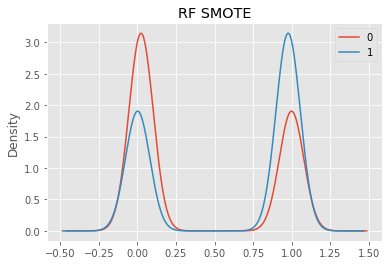

In [74]:
predict(pc_clean)

#Not so good results were obtained
#Default and weightened RF models predict that only around 60% of traffic was Benign
#SMOTE model predict that only 37% of traffic was Benign

[[     0 136280]
 [     1  83600]]
RF default 61.98 of traffic is Benign

[[     0 143808]
 [     1  76072]]
RF Balanced 65.40 of traffic is Benign

[[     0   4816]
 [     1 215064]]
RF SMOTE 2.19 of traffic is Benign



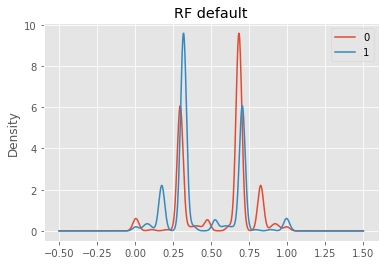

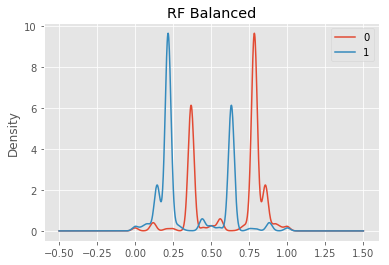

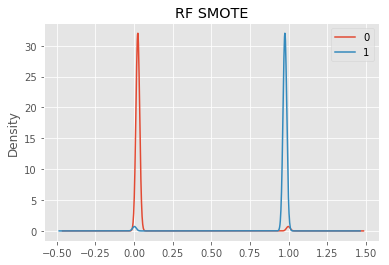

In [75]:
predict(pc_bf)

# Results and discussion

1. All 3 suggested models based on KM-RF approach showed decent predictive power on original dataset.

2. Despite that on new private dataset the predictios were not good, but not random. RF SMOTE model showed much lower precence    of benign traffic in dataset with bruteforce traffic vs normal traffic (2.19% of Benign traffic vs 37.75% of Benign traffic    accordingly).

3. The difference in the results in original and private datasets maybe due to the way the traffic was collected.
   Researches were using tcpdump utility under linux and 'patator' ssh bruteforcer for malicious traffic generation.
   But many parameters in these utilities may vary (versions, flags, OS, etc)

4. ALso, despite of using same utility ('CIC Flowmeter') that was suggested by authors of dataset, different features were        collected and used in our and researches final datasets. Researches used packets payload (from *.pcap files) and not only      the output of CIC Flowmeter, as we did. Payload of packets holds alot of information, but retrieving that payloads can be      challenging at this step.

5. Another difference may be the way traffic was splitted to application layers. We used Port as a label to split traffic to      application layers. Maybe there are some other ways. 

6. Dataset imbalance - few benign traffic comparing to malicious. It is interesting, that researches suggested to use KM-RF        model to remove outliers from the Benign traffic (those that farest from decision frontier). But in original and private        dataset that wasn't the case. Normal SSH activity generates not as much traffic as attack behaviour. Take a look on the size    of private collected data set and number of samples in original dataset.

And finally I very enjoyed to do this project, learnt a lot about RandomForest classification (with many hyperparameters - I think not gridsearch it but to know what and how to be applied - there real Data Science begins), and was happy to play with it on my private router.